# Feature Extraction

This notebook illustrates the feature extraction step applied on the cells of continuous adapting pyramidal cells (cADpyr) e-type.

Feature extraction step is performed using BluePyEfe software. BluePyEfe extracts electrical features from a group of cells.

In [1]:
import json
from pathlib import Path

import bluepyefe as bpefe
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
etype = "cADpyr"

Load the configuration file specifying features to be extracted and the voltage traces to be used.

In [3]:
with open("feature_extraction_config.json", "r") as json_file:
    config = json.load(json_file)

Responses to fixed electrophysiological protocols were recorded for each biological neuron.

Feature extraction step is performed on those recordings that are listed below.

In [4]:
config["features"].keys()

dict_keys(['APWaveform', 'IDrest', 'IDthresh', 'IV', 'SpikeRec', 'Step'])

The features extracted from the IDthresh protocol responses.

In [5]:
print(config["features"]["IDthresh"])

['adaptation_index2', 'mean_frequency', 'time_to_first_spike', 'ISI_log_slope', 'ISI_log_slope_skip', 'time_to_last_spike', 'inv_time_to_first_spike', 'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI', 'inv_fourth_ISI', 'inv_fifth_ISI', 'inv_last_ISI', 'voltage_deflection', 'voltage_deflection_begin', 'steady_state_voltage', 'decay_time_constant_after_stim']


The features extracted from the APWaveform protocol responses.

In [6]:
print(config["features"]["APWaveform"])

['AP_height', 'AHP_slow_time', 'doublet_ISI', 'AHP_depth_abs_slow', 'AP_width', 'time_to_first_spike', 'AHP_depth_abs', 'AHP_depth', 'fast_AHP', 'AHP_time_from_peak', 'AP1_peak', 'AP2_AP1_peak_diff', 'AP2_width', 'AP1_begin_width', 'AP2_peak', 'AHP2_depth_from_peak', 'AP1_width', 'AP2_begin_width', 'AP2_AP1_begin_width_diff', 'AHP1_depth_from_peak', 'AP1_amp', 'AP2_amp', 'AP_amplitude', 'AP1_amp', 'APlast_amp', 'AP_duration_half_width', 'fast_AHP', 'AHP_time_from_peak']


Extracting the features using the Extractor class.

The primary use-case of the Extractor class is to produce efeatures and protocols json files that can be used as input for single cell model building using BluePyOpt.

In [7]:
extractor = bpefe.Extractor(etype, config)
extractor.disable_extra_feature_plots()
extractor.create_dataset()

# does not produce output, stores object attributes
extractor.extract_features(threshold=-30)
extractor.mean_features()

extractor.analyse_threshold()
extractor.feature_config_cells()
extractor.feature_config_all()

INFO:root: Filling dataset
INFO:root: Extracting features
INFO:root: Setting spike threshold to -30.00 mV


/Users/tuncel/miniconda3/envs/sscx-paper/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/tuncel/miniconda3/envs/sscx-paper/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tuncel/miniconda3/envs/sscx-paper/lib/python3.9/site-packages/bluepyefe/extra.py:89: RuntimeWarning: divide by zero encountered in log
  log_freq = numpy.log(freq)
/Users/tuncel/miniconda3/envs/sscx-paper/lib/python3.9/site-packages/bluepyefe/extra.py:171: RuntimeWarning: divide by zero encountered in log
  log_freq = numpy.log(freq)
/Users/tuncel/miniconda3/envs/sscx-paper/lib/python3.9/site-packages/bluepyefe/extra.py:216: RuntimeWarning: overflow encountered in exp
  return a * numpy.exp(-x / tau) + d
/Users/tuncel/miniconda3/envs/sscx-paper/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:8

INFO:root: Calculating mean features
INFO:root: C060109A1-SR-C1 threshold amplitude: 0.180531 hypamp: -0.024070
INFO:root: C060109A2-SR-C1 threshold amplitude: 0.306797 hypamp: -0.202258
INFO:root: C060109A3-SR-C1 threshold amplitude: 0.225251 hypamp: -0.122463
INFO:root: C070109A4-C1 threshold amplitude: 0.334056 hypamp: -0.267563
INFO:root: C080501A5-SR-C1 threshold amplitude: 0.296731 hypamp: -0.278196
INFO:root: C080501B2-SR-C1 threshold amplitude: 0.325019 hypamp: -0.141169


/Users/tuncel/miniconda3/envs/sscx-paper/lib/python3.9/site-packages/bluepyefe/extractor.py:227: RuntimeWarning: Mean of empty slice
  return numpy.nanmean(a)
/Users/tuncel/miniconda3/envs/sscx-paper/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


INFO:root: Analysing threshold and hypamp and saving files to cADpyr/
INFO:root: Saving config files to cADpyr/C060109A1-SR-C1/
INFO:root: Saving config files to cADpyr/C060109A2-SR-C1/
INFO:root: Saving config files to cADpyr/C060109A3-SR-C1/
INFO:root: Saving config files to cADpyr/C070109A4-C1/
INFO:root: Saving config files to cADpyr/C080501A5-SR-C1/
INFO:root: Saving config files to cADpyr/C080501B2-SR-C1/
INFO:root: Saving config files to cADpyr/


The features are extracted into the './cADpyr' folder.

## Features extracted from single cells

In [8]:
with open(Path(etype) / "C060109A1-SR-C1" / "features.json", "r") as features_file:
    single_cell_features = json.load(features_file)

We are going to use the following functions in plotting the features.

In [9]:
def features_df(features_config: dict, protocol: str) -> pd.DataFrame:
    """Returns the dataframe containing features for the given protocol."""
    df = pd.DataFrame(features_config[protocol]["soma.v"])
    df["mean"] = df["val"].apply(lambda x : x[0])
    df["variance"] = df["val"].apply(lambda x : x[1])
    df = df.drop(['val', 'fid', 'strict_stim'], axis=1)
    return df

def feature_plot(df: pd.DataFrame, protocol: str) -> None:
    """Plots the features of a dataframe containing features extracted from a protocol."""
    fig, axs = plt.subplots()
    axs.errorbar(y = range(len(df)), x = df["mean"], xerr=df['variance'], fmt='o', color='midnightblue',
                ecolor='steelblue', elinewidth=2.5, capsize=6)
    axs.set_yticks(range(len(df)))
    axs.set_yticklabels(df["feature"])
    axs.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs.set_xlabel("feature values")
    plt.title(f"Features extracted on {protocol} protocol responses")
    plt.show()

In [10]:
step_120_protocol = "Step_120"
apwaveform_280_protocol = "APWaveform_280"
idrest_all_protocol = "IDrest_all"

The features extracted from the responses of Step_120 protocol are contained in the DataFrame below.

"n" stands for the number of responses used in computing this feature.


In [11]:
step_df = features_df(single_cell_features, step_120_protocol)
step_df.head(10)

,feature,n,mean,variance
0,AP_height,8,18.5570,1.0302
1,AHP_slow_time,8,0.2468,0.0225
2,ISI_CV,8,0.1303,0.1329
3,doublet_ISI,8,305.9500,184.2179
4,adaptation_index2,8,-0.0467,0.1095
5,mean_frequency,8,4.1766,0.7880
6,AHP_depth_abs_slow,8,-77.4808,0.6311
7,AP_width,8,1.6853,0.0208
8,time_to_first_spike,8,54.8125,7.3155
9,AHP_depth_abs,8,-74.2768,1.8450


The figure below illustrates the feature mean and variences computed from the Step_120 protocol responses.

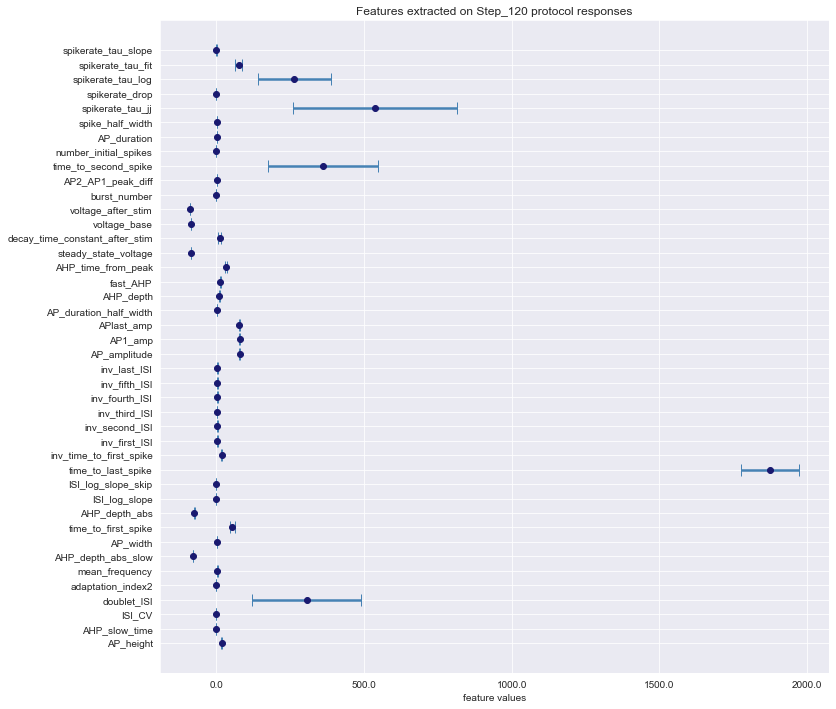

In [12]:
feature_plot(step_df, step_120_protocol)

Similarly, the features extracted from the APWaveform_280 responses are below

In [13]:
apwaveform_df = features_df(single_cell_features, apwaveform_280_protocol)
apwaveform_df.head(10)

,feature,n,mean,variance
0,AP_height,3,22.7563,0.4487
1,doublet_ISI,3,33.6333,1.7308
2,AP_width,3,1.4000,0.0010
3,time_to_first_spike,3,11.7000,0.1633
4,AHP_depth_abs,3,-61.4458,0.1875
5,AHP_depth,3,22.2649,0.2012
6,fast_AHP,3,-25.8708,0.1827
7,AHP_time_from_peak,3,3.1667,0.2625
8,AP1_peak,3,21.9938,0.4467
9,AP2_AP1_peak_diff,3,1.5250,0.3909


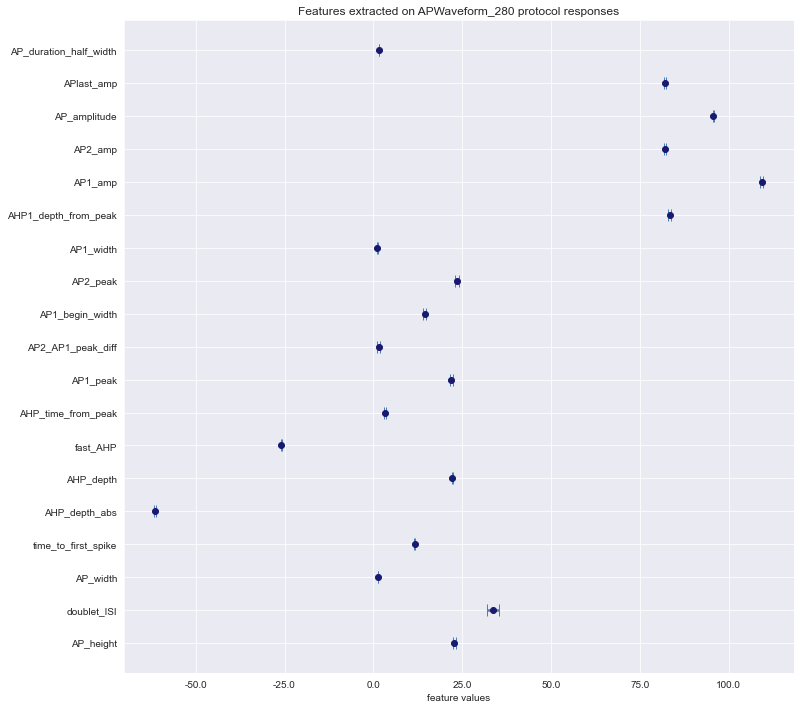

In [14]:
feature_plot(apwaveform_df, apwaveform_280_protocol)

The "IDrest_all" protocol contains all responses retrieved from various configurations of the "IDrest" protocols such as "IDrest_120", "IDrest_150" etc.

In [15]:
idrest_all_df = features_df(single_cell_features, idrest_all_protocol)
idrest_all_df.head(10)

,feature,n,mean,variance
0,AP_height,31,17.0403,1.8070
1,AHP_slow_time,31,0.3168,0.0618
2,ISI_CV,30,0.0707,0.0912
3,doublet_ISI,31,129.5710,256.4417
4,adaptation_index2,30,-0.0082,0.0610
5,mean_frequency,31,11.6463,5.1806
6,AHP_depth_abs_slow,31,-71.9260,3.3460
7,AP_width,31,1.9139,0.2142
8,time_to_first_spike,31,26.0484,47.8691
9,AHP_depth_abs,31,-71.0222,2.7827


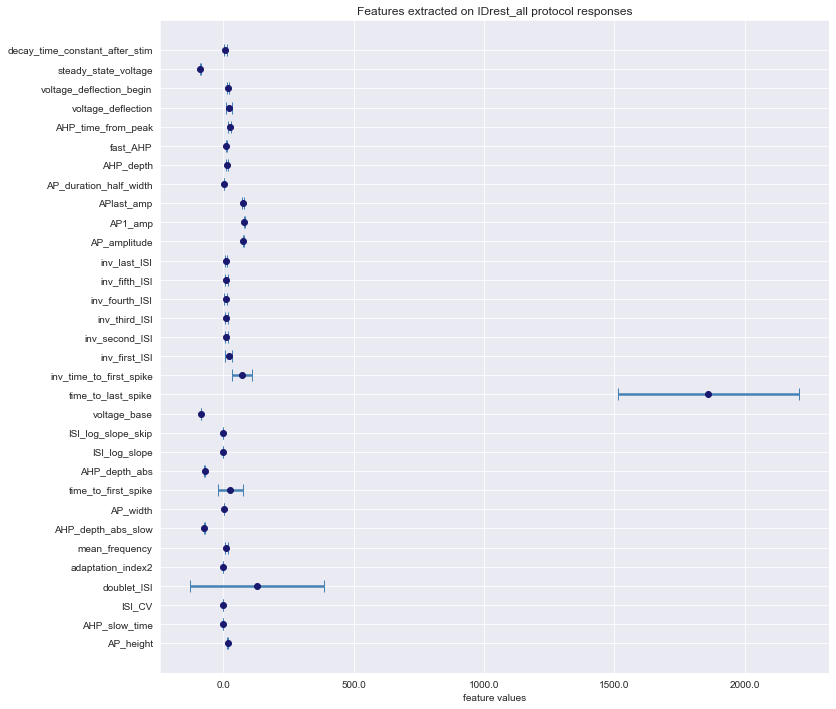

In [16]:
feature_plot(idrest_all_df, idrest_all_protocol)

## Features extracted from a group of cells

In this section we will look at the features extracted from a group of cells having the (cADpyr) e-type.

In [17]:
with open(Path(etype) / "features.json", "r") as features_file:
    etype_features = json.load(features_file)

The "n" column in this dataframe stands for the number of cells used in feature extraction.

In [18]:
etype_step_df = features_df(etype_features, step_120_protocol)
etype_step_df.head(10)

,feature,n,mean,variance
0,AP_height,6,18.0617,5.6467
1,AHP_slow_time,6,0.1613,0.0568
2,ISI_CV,5,0.2399,0.1884
3,doublet_ISI,6,648.1057,349.2538
4,adaptation_index2,5,-0.1367,0.1574
5,mean_frequency,6,8.4229,2.3862
6,AHP_depth_abs_slow,6,-71.8349,4.7759
7,AP_width,6,2.1144,0.6180
8,time_to_first_spike,6,50.8854,7.4180
9,AHP_depth_abs,6,-70.3445,4.2667


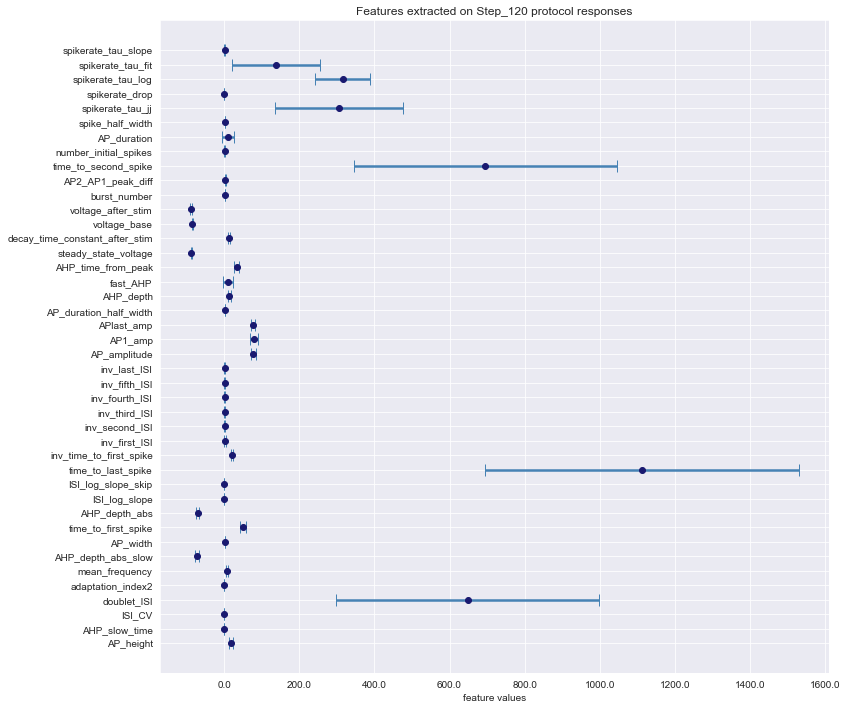

In [19]:
feature_plot(etype_step_df, step_120_protocol)

Similarly, the features extracted from the APWaveform responses are below.

In [20]:
etype_apwaveform_df = features_df(etype_features, apwaveform_280_protocol)
etype_apwaveform_df.head(10)

,feature,n,mean,variance
0,AP_height,5,19.4467,6.3270
1,doublet_ISI,5,23.9000,7.1127
2,AP_width,5,2.0100,0.6168
3,time_to_first_spike,5,12.0533,0.9368
4,AHP_depth_abs,5,-57.4887,3.2991
5,AHP_depth,5,25.3753,2.8730
6,fast_AHP,5,-37.2592,9.6825
7,AHP_time_from_peak,5,5.7667,2.3573
8,AP1_peak,5,18.8471,7.1360
9,AP2_AP1_peak_diff,5,1.1992,2.5558


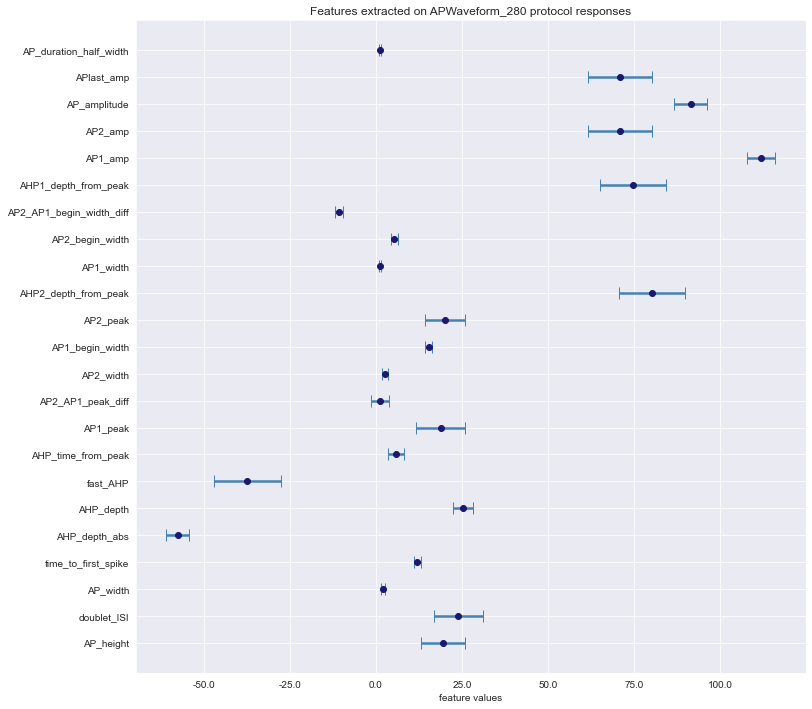

In [21]:
feature_plot(etype_apwaveform_df, apwaveform_280_protocol)

The features extracted from "IDrest_all" protocol for the e-type.

In [22]:
etype_idrest_all_df = features_df(etype_features, idrest_all_protocol)
etype_idrest_all_df.head(10)

,feature,n,mean,variance
0,AP_height,6,17.1680,4.4762
1,AHP_slow_time,6,0.3050,0.0219
2,ISI_CV,6,0.0920,0.0316
3,doublet_ISI,6,84.7086,30.3353
4,adaptation_index2,6,-0.0028,0.0073
5,mean_frequency,6,13.5539,1.8730
6,AHP_depth_abs_slow,6,-63.1301,6.3405
7,AP_width,6,3.0183,1.3588
8,time_to_first_spike,6,20.6241,3.9515
9,AHP_depth_abs,6,-63.0570,6.0201


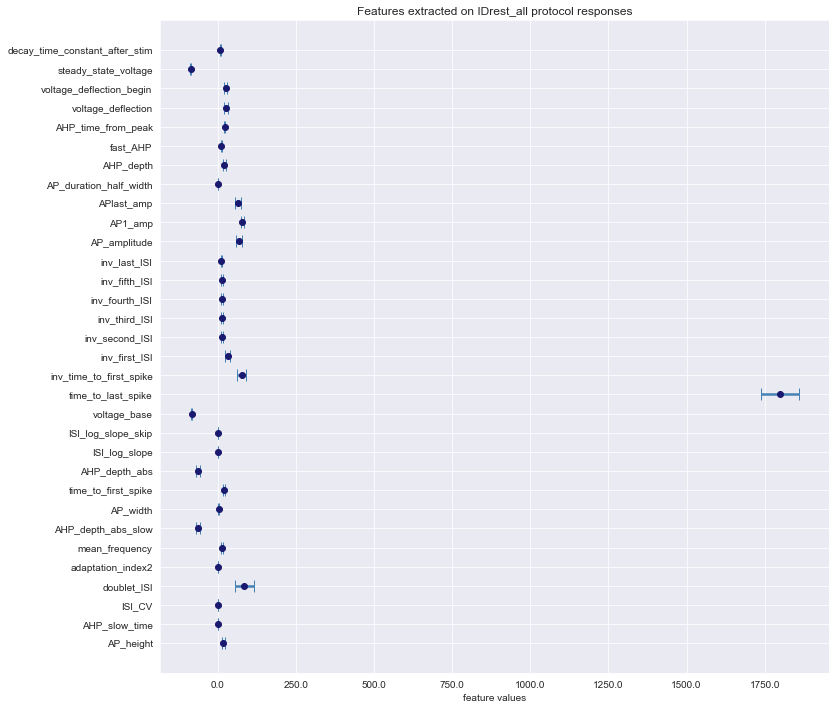

In [23]:
feature_plot(etype_idrest_all_df, idrest_all_protocol)